# WELCOME
notebook work by : Engr. Umar Zubairi

<img src="data/images/syncic.png" width=200 height=356 style="display: block; margin-left: auto; margin-right: auto;">

Special Thanks to [Javaya Nath](https://www.kaggle.com/code/jayaantanaath/student-habits-vs-academic-performance-ml-90/notebook)'s Notebook that has been a great help in my learning!

# Student Habits vs Academic Performance

Great for regression, classification, EDA, visualization, and even ML practice.

### About Dataset

This is a simulated dataset exploring how lifestyle habits affect academic performance in students. With 1,000 synthetic student records and 15+ features including study hours, sleep patterns, social media usage, diet quality, mental health, and final exam scores, it’s perfect for ML projects, regression analysis, clustering, and data viz. Created using realistic patterns for educational practice.

Ever wondered how much Netflix, sleep, or TikTok scrolling affects your grades? 👀 This dataset simulates 1,000 students' daily habits—from study time to mental health—and compares them to final exam scores. It's like spying on your GPA through the lens of lifestyle. Perfect for EDA, ML practice, or just vibing with data while pretending to be productive.

### About Data File

This CSV file contains a simulated yet realistic dataset titled “Student Habits vs Academic Performance: A Simulated Study”, featuring 1,000 student records. Each row represents an individual student, capturing daily lifestyle habits such as study time, sleep, social media use, diet quality, mental health rating, and more—mapped against their final exam score. Designed for machine learning, regression, classification, EDA, and data visualization tasks, this dataset is ideal for educational analysis and experimentation in data science projects. It's structured, clean, and ready for exploration, modeling, and storytelling.

### Steps:

1. Import necessary libraries and load the dataset.
2. Perform exploratory data analysis (EDA) to understand the distribution of variables.
3. Visualize the relationships.
4. Data cleaning, handling missing values, and encoding categorical variables.
5. Split the data into training and testing sets.
6. Train a model to predict final exam scores based on lifestyle habits.
7. Evaluate the model's performance using metrics such as mean squared error (MSE).
8. Compare the performance of different models (e.g., linear regression, decision trees, random forests etc.)
9. Best Model Selection and Deployment

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score

import joblib

## Loading dataset

In [2]:
df = pd.read_csv('data/student_habits_performance.csv')
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

conclusion:
 - 1000 entries
 - `parental_education_level` has empty data
 - all other fields are full
 - `exam_score` is output.

## Filling missing values

In [4]:
df.isnull().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [5]:
df["parental_education_level"] = df["parental_education_level"].fillna(df["parental_education_level"].mode()[0])
df["parental_education_level"].isnull().sum()

np.int64(0)

In [6]:
df.isnull().sum()

student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64

Now we have no field with empty values.

In [7]:
print(df.columns)

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')


`student_id` has no affect on data and output and is totally independent, hence lets remove it.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       1000 non-null   object 
 12  internet_quality               1000 non-null   ob

now lets compare some stuff!

start with columns that have `object` Dtype

In [9]:
obj_cols = df.select_dtypes(include='object').columns
obj_cols = [col for col in obj_cols]
obj_cols

['student_id',
 'gender',
 'part_time_job',
 'diet_quality',
 'parental_education_level',
 'internet_quality',
 'extracurricular_participation']

we now have a list of columns that contain Dtype `object` in our `dataframe`

`student_id` is useless for us right now and serves no purpose in our analysis. We can drop it from our dataframe.

In [10]:
obj_cols.remove("student_id")
obj_cols

['gender',
 'part_time_job',
 'diet_quality',
 'parental_education_level',
 'internet_quality',
 'extracurricular_participation']

let's print some beautiful graphs!

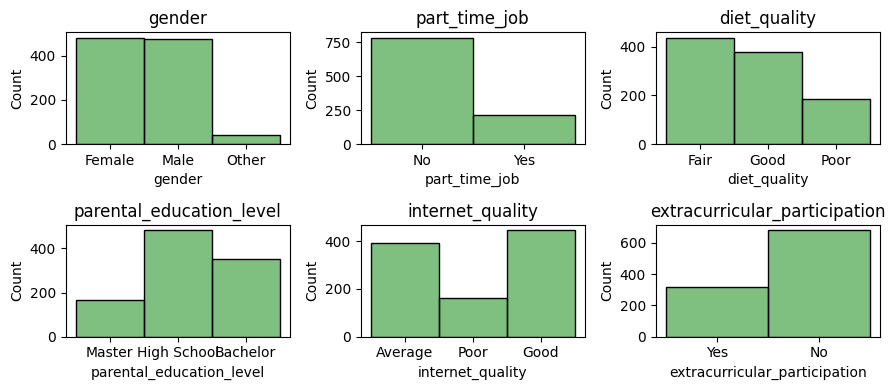

In [11]:
plt.figure(figsize=(9, 4))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    sns.histplot(x=obj_cols[i], data=df, color="green", alpha=0.5)
    plt.title(obj_cols[i])

plt.tight_layout()
plt.show()

Cool! now lets study our data with numeric values.

In [12]:
num_cols = df.select_dtypes(exclude='object').columns
num_cols = [col for col in num_cols]
num_cols

['age',
 'study_hours_per_day',
 'social_media_hours',
 'netflix_hours',
 'attendance_percentage',
 'sleep_hours',
 'exercise_frequency',
 'mental_health_rating',
 'exam_score']

let's print and see some beautiful graphs for understanding numeric connections!

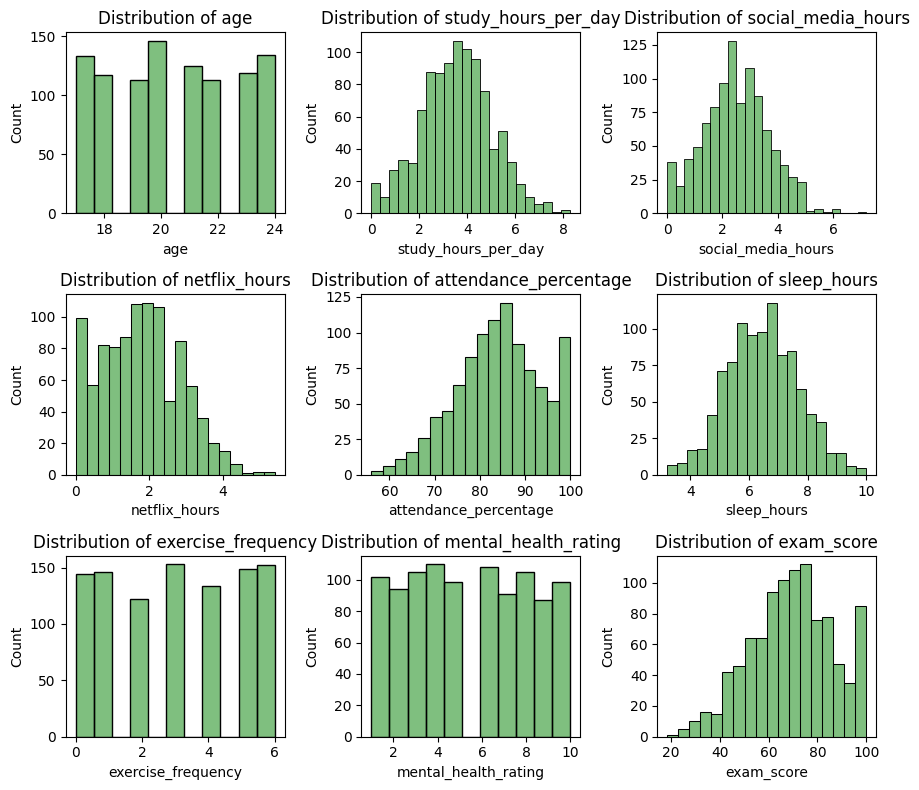

In [13]:
plt.figure(figsize=(9, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    sns.histplot(x=num_cols[i], data=df, color="green", alpha=0.5)
    plt.title('Distribution of ' + num_cols[i])

plt.tight_layout()
plt.show()

now let's see some info from our `dataframe` with reference to these curves

In [14]:
df[obj_cols].describe()

,gender,part_time_job,diet_quality,parental_education_level,internet_quality,extracurricular_participation
count,1000,1000,1000,1000,1000,1000
unique,3,2,3,3,3,2
top,Female,No,Fair,High School,Good,No
freq,481,785,437,483,447,682


In [15]:
df[num_cols].describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


Let's see some correlation between values!

this will help us understand what values in our `dataframe` affect others and how much they affect them.

dor this we must remove some point-less data and perform some OHE Encoding and Label Encoding. This will help us convert our `object` Dtypes into `numerical` Dtypes which can be used in our model.

In [16]:
df_clean = df.drop("student_id", axis=1)
df_clean

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


In [17]:
for col in obj_cols:
    print(col)

gender
part_time_job
diet_quality
parental_education_level
internet_quality
extracurricular_participation


Encoding categorical data is essential in machine learning because most algorithms require numerical input. Two common encoding techniques are Label Encoding and One-Hot Encoding (OHE), each with different use cases and effects.

### Label Encoding
What it does: Converts each category in a categorical variable into a unique integer label. For example, categories ["Red", "Blue", "Green"] might be encoded as [1][2].

When to use:
-When the categorical variable is ordinal (has an inherent order), e.g., ["Low", "Medium", "High"].
-When you want to keep the feature space small, especially if there are many categories.

Limitations:
-Implies an ordinal relationship where none may exist, which can mislead some algorithms into assuming a ranking (e.g., 0 < 1 < 2) even if categories are nominal.

Advantages:
-Efficient, uses a single column.
-Works well with tree-based models that do not assume order.


### One-Hot Encoding (OHE)
What it does: Creates binary columns for each category of a categorical variable. Each column corresponds to one category, with 1 indicating presence and 0 absence. For example, ["Red", "Blue", "Green"] becomes three columns: color_red, color_blue, color_green.

When to use:
-When the categorical variable is nominal (no order).
-When you want to avoid introducing artificial ordinal relationships.
-When the number of categories is relatively small to avoid high dimensionality.

Limitations:
-Can lead to a large number of columns (curse of dimensionality) if categories are many.

Advantages:
-Maintains categorical independence.
-Preferred for linear models, neural networks, and algorithms sensitive to numeric ordering

*FOR THIS TASK:*
1. Label encoding : diet_quality, parental_education, internet_quality
2. One Hot Encoding : gender, part_time_job, extracurricular_participation

### LABEL ENCODING

In [18]:
diet_quality = {'Poor': 0, 'Fair': 1, 'Good': 2}
parental_education_level = {'High School' : 0, 'Bachelor' : 1, 'Master' : 2}
internet_quality  = {'Poor' : 0, 'Average' : 1, 'Good' : 2}

In [19]:
df_clean['dq_e'] = df_clean['diet_quality'].map(diet_quality)
df_clean['pel_e'] = df_clean['parental_education_level'].map(parental_education_level)
df_clean['iq_e'] = df_clean['internet_quality'].map(internet_quality)

now that we have applied label encoding, let's apply one-hot encoding

we can do this by either using `scikit-learn`'s `OneHotEncoder` or `pandas`' `get_dummies` function

In [20]:
dummies = pd.get_dummies(df_clean[['gender', 'part_time_job', 'extracurricular_participation']], drop_first=True)
dummies.head()

,gender_Male,gender_Other,part_time_job_Yes,extracurricular_participation_Yes
0,False,False,False,True
1,False,False,False,False
2,True,False,False,False
3,False,False,False,True
4,False,False,False,False


In [21]:
df_updated = pd.concat([df_clean, dummies], axis=1)
df_updated

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,...,mental_health_rating,extracurricular_participation,exam_score,dq_e,pel_e,iq_e,gender_Male,gender_Other,part_time_job_Yes,extracurricular_participation_Yes
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,...,8,Yes,56.2,1,2,1,False,False,False,True
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,...,8,No,100.0,2,0,1,False,False,False,False
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,...,1,No,34.3,0,0,0,True,False,False,False
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,...,1,Yes,26.8,0,2,2,False,False,False,True
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,...,1,No,66.4,1,2,2,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,...,6,Yes,76.1,1,0,2,False,False,False,True
996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,...,6,Yes,65.9,0,0,1,False,False,True,True
997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,...,9,Yes,64.4,2,1,2,True,False,False,True
998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,...,1,No,69.7,1,1,1,True,False,True,False


now we have some extra data we want to get rid off. so let's remove them!

In [22]:
df_updated = df_updated.drop([
    'gender',
    'part_time_job',
    'extracurricular_participation',
    'diet_quality',
    'parental_education_level',
    'internet_quality'
], axis=1)

In [23]:
df_updated

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,dq_e,pel_e,iq_e,gender_Male,gender_Other,part_time_job_Yes,extracurricular_participation_Yes
0,23,0.0,1.2,1.1,85.0,8.0,6,8,56.2,1,2,1,False,False,False,True
1,20,6.9,2.8,2.3,97.3,4.6,6,8,100.0,2,0,1,False,False,False,False
2,21,1.4,3.1,1.3,94.8,8.0,1,1,34.3,0,0,0,True,False,False,False
3,23,1.0,3.9,1.0,71.0,9.2,4,1,26.8,0,2,2,False,False,False,True
4,19,5.0,4.4,0.5,90.9,4.9,3,1,66.4,1,2,2,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,2.6,0.5,1.6,77.0,7.5,2,6,76.1,1,0,2,False,False,False,True
996,17,2.9,1.0,2.4,86.0,6.8,1,6,65.9,0,0,1,False,False,True,True
997,20,3.0,2.6,1.3,61.9,6.5,5,9,64.4,2,1,2,True,False,False,True
998,24,5.4,4.1,1.1,100.0,7.6,0,1,69.7,1,1,1,True,False,True,False


## CORRELATION

now lets see how each individual variable compares with its counterparts. basically which variable affects the other variables the most. we will use the correlation matrix to see this.

In [24]:
df_updated

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,dq_e,pel_e,iq_e,gender_Male,gender_Other,part_time_job_Yes,extracurricular_participation_Yes
0,23,0.0,1.2,1.1,85.0,8.0,6,8,56.2,1,2,1,False,False,False,True
1,20,6.9,2.8,2.3,97.3,4.6,6,8,100.0,2,0,1,False,False,False,False
2,21,1.4,3.1,1.3,94.8,8.0,1,1,34.3,0,0,0,True,False,False,False
3,23,1.0,3.9,1.0,71.0,9.2,4,1,26.8,0,2,2,False,False,False,True
4,19,5.0,4.4,0.5,90.9,4.9,3,1,66.4,1,2,2,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,2.6,0.5,1.6,77.0,7.5,2,6,76.1,1,0,2,False,False,False,True
996,17,2.9,1.0,2.4,86.0,6.8,1,6,65.9,0,0,1,False,False,True,True
997,20,3.0,2.6,1.3,61.9,6.5,5,9,64.4,2,1,2,True,False,False,True
998,24,5.4,4.1,1.1,100.0,7.6,0,1,69.7,1,1,1,True,False,True,False


<Axes: >

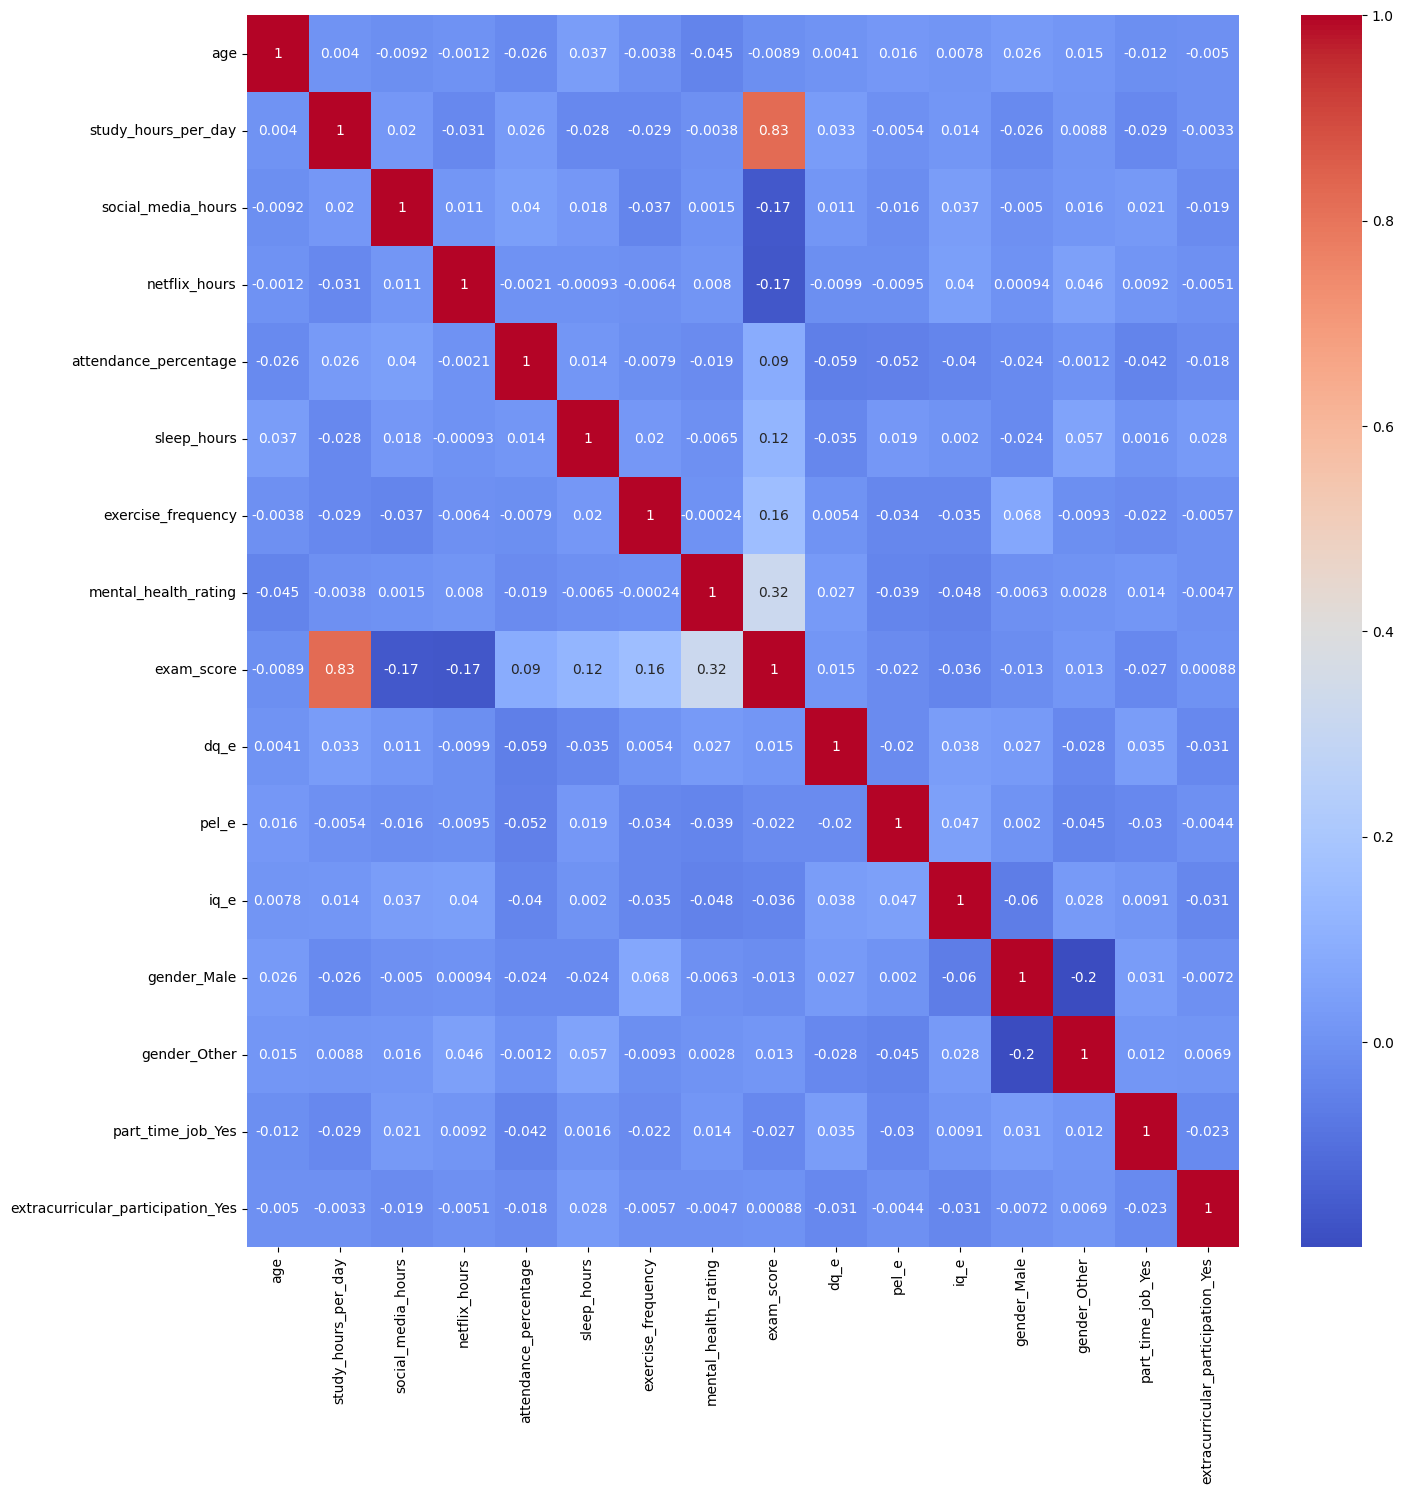

In [25]:
plt.figure(figsize=(16, 16))
df_corr = df_updated.corr()
sns.heatmap(df_corr, annot=True, cmap="coolwarm")


now that we have almost all we need, lets make some data sets for us to train and validate our models.

In [26]:
df_working = df_updated

In [27]:
df_working.head()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,dq_e,pel_e,iq_e,gender_Male,gender_Other,part_time_job_Yes,extracurricular_participation_Yes
0,23,0.0,1.2,1.1,85.0,8.0,6,8,56.2,1,2,1,False,False,False,True
1,20,6.9,2.8,2.3,97.3,4.6,6,8,100.0,2,0,1,False,False,False,False
2,21,1.4,3.1,1.3,94.8,8.0,1,1,34.3,0,0,0,True,False,False,False
3,23,1.0,3.9,1.0,71.0,9.2,4,1,26.8,0,2,2,False,False,False,True
4,19,5.0,4.4,0.5,90.9,4.9,3,1,66.4,1,2,2,False,False,False,False


In [28]:
X = df_working.drop('exam_score', axis=1)
y = df_working['exam_score']
(X.shape, y.shape)

((1000, 15), (1000,))

### Scaling
StandardScaler in scikit-learn is a preprocessing tool used to standardize features by removing the mean and scaling to unit variance. This means it transforms each feature individually so that it has a mean (average) of 0 and a standard deviation of 1.

What is StandardScaler?
It computes the `mean *μ*` and `standard deviation *σ*` of each feature (column) in your training data.

- Then it transforms each value.
- The resulting transformed features have a mean of *0* and standard deviation of *1*.
- This standardization is done independently for each feature.

Why use StandardScaler?

- Many machine learning algorithms (e.g., Support Vector Machines, K-Nearest Neighbors, Logistic Regression) perform better or converge faster when features are on the same scale.

- Features with different scales can bias the model because those with larger scales dominate the objective function.
- StandardScaler ensures all features contribute equally by balancing their scales.
- It helps algorithms that assume data is normally distributed or centered around zero.
- Improves model performance and stability.

When to use?
- When your features have different units or scales.
- Before applying algorithms sensitive to feature scaling, such as:
    - SVMs
    - KNN
    - Logistic Regression
    - Neural Networks

When you want to speed up convergence of gradient-based algorithms.

In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape  # this will show the shape after scaling

(1000, 15)

In [30]:
X_scaled

array([[ 1.08455114, -2.41806844, -1.11406369, ..., -0.20938323,
        -0.52334057,  1.46446375],
       [-0.21586989,  2.28170684,  0.25131502, ..., -0.20938323,
        -0.52334057, -0.6828438 ],
       [ 0.21760379, -1.46449085,  0.50732352, ..., -0.20938323,
        -0.52334057, -0.6828438 ],
       ...,
       [-0.21586989, -0.37468788,  0.08064268, ..., -0.20938323,
        -0.52334057,  1.46446375],
       [ 1.51802481,  1.26001656,  1.36068521, ..., -0.20938323,
         1.91080161, -0.6828438 ],
       [-0.64934357,  0.51077703,  0.33665119, ..., -0.20938323,
        -0.52334057, -0.6828438 ]], shape=(1000, 15))

## Train Test Split

Now lets divide the data that we have into train dataset, and test dataset. This will help us train, and validate our ML models. We can also use these sets to determine which model is working best for our data.

We will use 80% of data for training and 20% for validating.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 15), (200, 15), (800,), (200,))

Now we have two datasets.
(`X_train`, `y_train`), (`X_test`, `y_test`) 

## Testing different Models

In [32]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor


In [33]:
models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    "Decision Tree": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "KNN": KNeighborsRegressor(),
    "SVR": SVR(kernel='rbf', C=100, epsilon=0.1)
    
}

now that we have setup all the models we want to test, lets train them, predict results from them, see results and also save each model to a file so we can use them later.

In [34]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Print performance
    mse = root_mean_squared_error(y_test, y_pred)
    print(f"{name} → R²: {r2_score(y_test, y_pred):.3f}, RMSE: {mse:.2f}")

    # Save model
    joblib.dump(model, f"models/{name.replace(' ', '_').lower()}.pkl")

Linear → R²: 0.899, RMSE: 5.09
Ridge → R²: 0.899, RMSE: 5.09
Lasso → R²: 0.898, RMSE: 5.10
Random Forest → R²: 0.810, RMSE: 6.98
Decision Tree → R²: 0.692, RMSE: 8.88
Gradient Boosting → R²: 0.879, RMSE: 5.57
KNN → R²: 0.563, RMSE: 10.58
SVR → R²: 0.823, RMSE: 6.74


Checking models and comparing with cross validations.

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.metrics import make_scorer, r2_score

In [36]:
scoring = {
    'r2': 'r2',
    'rmse': make_scorer(root_mean_squared_error)
}

In [37]:
clf = svm.SVC(kernel='linear', C=1, random_state=42)

In [38]:
for name, model in models.items():
    cv = cross_val_score(model, X, y, cv=5)
    print(f"{name} → Cross-val Score: {cv}, Mean: {cv.mean():.2f}, Standard Deviation: {cv.std():.2f}")

Linear → Cross-val Score: [0.89129178 0.91246731 0.88794957 0.90248063 0.88516188], Mean: 0.90, Standard Deviation: 0.01
Ridge → Cross-val Score: [0.89136371 0.91244097 0.88798649 0.90247594 0.88519963], Mean: 0.90, Standard Deviation: 0.01
Lasso → Cross-val Score: [0.89230369 0.91196575 0.88861189 0.90489557 0.88622598], Mean: 0.90, Standard Deviation: 0.01
Random Forest → Cross-val Score: [0.83197011 0.8364992  0.79590088 0.84906258 0.764623  ], Mean: 0.82, Standard Deviation: 0.03
Decision Tree → Cross-val Score: [0.75622109 0.78674238 0.70781518 0.76836767 0.67004149], Mean: 0.74, Standard Deviation: 0.04
Gradient Boosting → Cross-val Score: [0.88008375 0.90202209 0.86815834 0.88287251 0.85517179], Mean: 0.88, Standard Deviation: 0.02
KNN → Cross-val Score: [0.55336969 0.58786727 0.5794862  0.62792248 0.53235342], Mean: 0.58, Standard Deviation: 0.03
SVR → Cross-val Score: [0.889144   0.89385929 0.87687559 0.88533648 0.8692721 ], Mean: 0.88, Standard Deviation: 0.01


The best result would be with highest mean and lowest standard deviation.

Hence in this case, the linear models, Linear, Ridge and Lasso, create the best possible outcomes!

<img src="data/images/aura farmed.jpg" width=600 height=300 style="display: block; margin-left: auto; margin-right: auto;">

WE HAVE DECIDED, `LINEAR` IS THE BEST MODEL AMONGST ALL GIVING US THE BEST OUTPUT!

# Thank You

if you liked the notebook, give it an upvote!
